# import 및 경로 설정

In [15]:
import cv2
import numpy as np
import json
import os
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
import requests
from io import BytesIO

In [2]:
%cd /content/drive/My Drive/당구장/

/content/drive/.shortcut-targets-by-id/1-T9g26pyici3xu1RK324f98duFalKGHZ/당구장


In [3]:
%ls

TL_당구장/  VL_당구장/  파일/


# 파일 불러오기 (label, picture)

In [4]:
def read_all_file(path):
    output = os.listdir(path)
    file_list = []

    for i in output:
        if os.path.isdir(path+"/"+i): 
            file_list.extend(read_all_file(path+"/"+i)) 
        elif os.path.isfile(path+"/"+i):
            file_list.append(path+"/"+i)

    return file_list

In [16]:
# Label

filelist = read_all_file("VL_당구장/pool01")
filelist.sort()

label = []
for i in range(len(filelist)):
  with open(filelist[i], 'r') as f:
    data = json.load(f)
    label.append(data)

In [17]:
# 사진

filelists = read_all_file("TL_당구장/pool01")
filelists.sort()

picture = []
for i in range(len(filelists)):
  pic = Image.open((filelists[i]))
  pic_array = np.asarray(pic)
  picture.append(pic_array)

In [14]:
print(filelist[0])
print(filelists[0])

VL_당구장/pool01/1476600_595.json
TL_당구장/pool01/1476600_595.jpg


# 예시 데이터 

In [18]:
a = Image.open('TL_당구장/pool01/2205445_595.jpg')
a_array = np.asarray(a)

In [19]:
with open('VL_당구장/pool01/2205445_595.json', 'r') as f:
  b = json.load(f)

In [29]:
k = b['annotations'][0]['bbox']

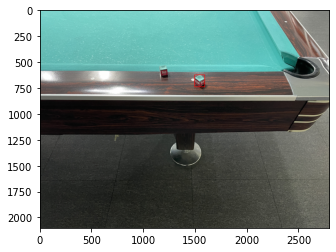

In [31]:
# 하나만
c = a_array.copy()
img = cv2.rectangle(c, (int(k[0]),int(k[1])), (int(k[0])+int(k[2]), int(k[1])+int(k[3])), (255,0, 0), 3 )
plt.imshow(img);

In [36]:
#여러개로 일반화 -> 사진은 saved_img에 한꺼번에 저장됨
saved_img = []
for i in range(len(b['annotations'])):
  k = b['annotations'][i]['bbox']
  c = a_array.copy()
  img = cv2.rectangle(c, (int(k[0]),int(k[1])), (int(k[0])+int(k[2]), int(k[1])+int(k[3])), (255,0, 0), 3 )
  saved_img.append(img)

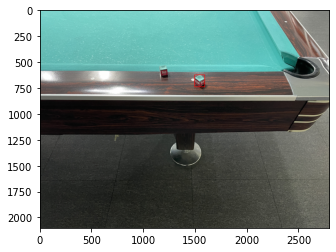

In [39]:
plt.imshow(saved_img[0])

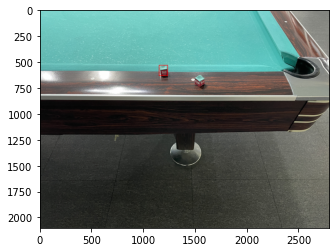

In [40]:
plt.imshow(saved_img[1])

# 전체 데이터 확장

In [42]:
print(len(filelists))
print(len(filelist))

286
286


In [43]:
print(len(label))
print(len(picture))

286
286


In [52]:
saved_img = []
labels = []

for i in range(10):
  for j in range(len(label[i]['annotations'])):
    k = label[i]['annotations'][j]['bbox']
    c = picture[i].copy()
    img = cv2.rectangle(c, (int(k[0]),int(k[1])), (int(k[0])+int(k[2]), int(k[1])+int(k[3])), (255,0, 0), 3 )
    saved_img.append(img)
    labels.append(label[i]['annotations'][j]['category_id'])

In [45]:
len(saved_img)

27

In [53]:
len(labels)

27

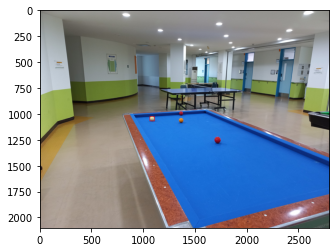

In [46]:
# 확인
plt.imshow(saved_img[0])

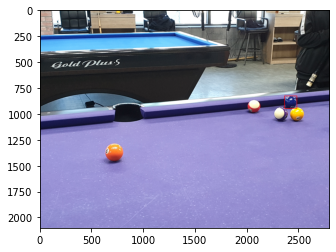

In [47]:
plt.imshow(saved_img[25]);